### Sarcasm Dataset EDA

#### Sveto Givaty

#### 10/20/2023

----------------------------------------------------------------------------------------------------------------------------

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re

from sklearn.feature_extraction.text import CountVectorizer


In [74]:
# importing data and setting it to variable
reddit = pd.read_csv('train-balanced-sarcasm.csv')

In [75]:
parent_comment = reddit.copy().pop('parent_comment')

In [76]:
# checking amount of rows and columns
reddit.shape

(1010826, 10)

There are ~ 1 million rows and 10 columns

In [77]:
# checking datatypes, null values, column names
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


We have two different datatypes present in the data: `int` and `object`. There are null values present in one column, `comment`. We will go on to explore this later.

In [78]:
# seeing first 10 results of data
reddit.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?
6,0,Trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,2016-10-23 21:43:03,What's your weird or unsettling Trick or Treat...
7,0,Blade Mastery+Masamune or GTFO!,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,2016-10-13 21:13:55,Probably Sephiroth. I refuse to taint his grea...
8,0,"You don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,2016-10-27 19:11:06,What to upgrade? I have $500 to spend (mainly ...
9,0,I would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,2016-11-21 23:39:12,Probably count Kanye out Since the rest of his...


There are two date columns, `date` and `created_utc`. This causes a redundancy in the data as it seems the `date` column matches the `year` and `month` of the `created_utc` column exactly.

In [79]:
# converting created_utc to datetime format
reddit['created_utc'] = pd.to_datetime(reddit['created_utc'])

In [80]:
# confirmation of change
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   label           1010826 non-null  int64         
 1   comment         1010773 non-null  object        
 2   author          1010826 non-null  object        
 3   subreddit       1010826 non-null  object        
 4   score           1010826 non-null  int64         
 5   ups             1010826 non-null  int64         
 6   downs           1010826 non-null  int64         
 7   date            1010826 non-null  object        
 8   created_utc     1010826 non-null  datetime64[ns]
 9   parent_comment  1010826 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 77.1+ MB


Using slices of both the `date` and `created_utc` columns, we can see if the results match. If the resulting slices have equal length, we can assume that they represent the same thing and that there is a redundancy in the columns.

In [81]:
# using loop to find specific dates
x = []
for i in reddit['date']:
    if i == '2016-10':
        x.append(i)

In [82]:
# checking length of result
print(len(x))

46161


In [83]:
# filtering out created_utc to match dates in `date` column
date_test = reddit.loc[(reddit['created_utc'].dt.year == 2016) & (reddit['created_utc'].dt.month == 10) ]

In [84]:
# checking for amount of entries
date_test.shape[0]

46161

Seeing as the `date` column matches the `created_utc` column exactly, we can drop the `date` column.

In [85]:
# dropping date
reddit.drop(columns='date', inplace =True)

In [86]:
# verifying drop
reddit.head()

,label,comment,author,subreddit,score,ups,downs,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


-----------------------------------------------------------------------------------------------------------------

Next, we will see if there are any null values in the data.

In [87]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   label           1010826 non-null  int64         
 1   comment         1010773 non-null  object        
 2   author          1010826 non-null  object        
 3   subreddit       1010826 non-null  object        
 4   score           1010826 non-null  int64         
 5   ups             1010826 non-null  int64         
 6   downs           1010826 non-null  int64         
 7   created_utc     1010826 non-null  datetime64[ns]
 8   parent_comment  1010826 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 69.4+ MB


It seems the only column that has null values is the `comment` column.

In [88]:
# checking nulls in more readable way
reddit.isna().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
created_utc        0
parent_comment     0
dtype: int64

In [89]:
# slicing out null comments 
null_comment = reddit.loc[reddit['comment'].isna()]
null_comment

,label,comment,author,subreddit,score,ups,downs,created_utc,parent_comment
56269,1,NaN,SodokuIRL,leagueoflegends,1,1,0,2016-09-28 08:23:04,"LPL shitshow, EU LCS shitshow. What isn't a sh..."
68590,1,NaN,TossTheDog,westchesterpa,1,-1,-1,2016-10-11 20:25:52,Car fires smell delicious to you? You should p...
135348,0,NaN,So12rovv,R6STeams,1,-1,-1,2016-12-22 17:24:05,Will do. EU or NA?
199910,0,NaN,Khvostov_7g-02,tf2,1,1,0,2016-05-16 05:46:43,"woah, thanks."
258718,1,NaN,PeaceLovePositivity,vaporents,5,5,0,2016-06-22 20:37:11,"No, doing drugs while forming a fetus (your ki..."
284331,0,NaN,FieldDay,ar15,1,1,0,2016-05-20 22:18:51,"Fuck you too, buddy."
312969,0,NaN,dont_wear_a_C,nameaserver,1,1,0,2016-08-05 07:36:37,Thu 2016-08-04 accessing vault............unlo...
328775,1,NaN,wedontlikespaces,todayilearned,6,6,0,2016-08-18 12:36:21,What symbol denotes suck?
331735,1,NaN,atlacatl,soccer,1,1,0,2016-06-14 13:38:04,Doesn't matter if that experience is garbage
332600,1,NaN,Wemorg,leagueoflegends,-16,-16,0,2016-03-03 12:04:43,Your favourite lol joke?


In [90]:
# calculating percentage of sarcastic entries in `null` sample
round(null_comment['label'].sum() / null_comment.shape[0]*100, 2)

84.91

In [91]:
# checking distribution of sarcastic vs not in entire dataset
reddit['label'].value_counts()

0    505413
1    505413
Name: label, dtype: int64

Unfortunately 81% of our null `comment` values are (or were) sarcastic. It would be a shame to lose this valuable data and mess up the perfect distribution of sarcastic to not.

Ideally, we would go to reddit, find all of these comments, and replace the null values. We could also set them to a placeholder value like `unknown_comment`. Given that the `sarcastic` distribution is and 80/20 split in this case, it would be adviseable to withhold the placeholder as it will be later used as a token to predict the likelihood of sarcasm and even this small sample may skew the results, making `unknown_comment` a great predictor of sarcasm.

We will choose to drop the rows altogether, which will ultimately have a minimal effect on the prediction.

In [92]:
# dropping rows
reddit.dropna(inplace=True)

In [93]:
# sanity check
reddit.isna().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
created_utc       0
parent_comment    0
dtype: int64

In [94]:
# checking for duplicate rows
reddit.duplicated().sum()

28

There are 28 duplicate rows in our dataset consisting of 1 million. We can quickly examine the rows in question to see if we find a pattern.

In [95]:
reddit.loc[reddit.duplicated()]

,label,comment,author,subreddit,score,ups,downs,created_utc,parent_comment
23777,1,Said the under 2k post karma guy *expert*,iam4real,youdontsurf,1,-1,-1,2016-11-02 10:09:10,This subreddit really does suck.
78313,1,"USE REAL WORDS, DAMN IT",FlameSpartan,TumblrInAction,1,1,0,2016-09-07 00:31:39,"Yo, that's such a kawai'i level of desu, it ma..."
160906,1,Hey you're that one guy who racked in all that...,OG_Phx_Son,pcmasterrace,1,-1,-1,2016-10-02 15:56:40,Practice mowing lawns pls
201633,1,"Because Sandy Hook, CT and Aurora, CO were so ...",Gogomelo,news,-9,-9,0,2016-07-31 11:59:53,"Just stay out of ghetto neighborhoods, violent..."
223116,1,That's just a player who knows how to get maxi...,Ignitus1,heroesofthestorm,1,1,0,2016-08-06 19:40:18,tell that to the murky I played with yesterday...
281522,1,Im sure players would LOVE to have to fly all ...,pewpewpew52,nfl,2,2,0,2016-07-02 05:19:20,London.
300841,1,What if the velocity of the electricity is pro...,GoldenScarab569,AskReddit,1,1,0,2016-06-30 15:10:20,Electricity takes 1/143 of a second to travel ...
306604,1,Hes got Diaz and GSP lined up Wonderboy will h...,Kgb725,MMA,1,1,0,2016-08-01 09:03:45,I feel like if Woodley decides to carry on wit...
307543,1,Only right wing nut jobs worry about that sort...,qemist,Economics,0,0,0,2016-08-22 04:46:33,"But if society collapses, how am I supposed to..."
313724,1,Unless your neighbour's face is hidden under a...,deadcat,australia,1,1,0,2016-07-04 21:45:37,It's much easier to blindly hate a faceless id...


The only pattern to be seen is that all duplicate rows are sarcastic, which is again, unfortunate. We will go ahead and drop the rows.

In [96]:
# dropping duplicates
reddit.drop_duplicates(inplace=True)

In [97]:
# sanity
reddit.duplicated().sum()

0

Now that our null values and duplicates have been eliminated, we will go on to explore the dataset to get to know the distributions of values and check for outliers and oddities.

It is easiest to start with the numeric columns so let us focus on the `ups`, `downs` and `score`

In [98]:
# gathering basic info on `ups` column
reddit['ups'].describe()

count    1.010745e+06
mean     5.499283e+00
std      4.127458e+01
min     -5.070000e+02
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.163000e+03
Name: ups, dtype: float64

In [99]:
reddit['ups'].median()

1.0

A few things to note:
- 75% of the values fall below 3
- **25% of the values fall below 0**
- The median is 1 and the mean is 5.5
- max value is 5000 and min is **-500**



The fact that negative values are present in the `ups` column is an area of concern and requires investigation. We would expect all values in the `ups` column to be positive, as every `upvote` or `like` raises the total. We would also expect the `downs` values to be either positive or negative, and the `score` column to be the total calculated by either the subtraction of the `downs` from the `ups`, or the addition of the positive `ups` to the negative `downs`.

C:\Users\gravi\anaconda3\envs\sarcasm\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\gravi\anaconda3\envs\sarcasm\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: >

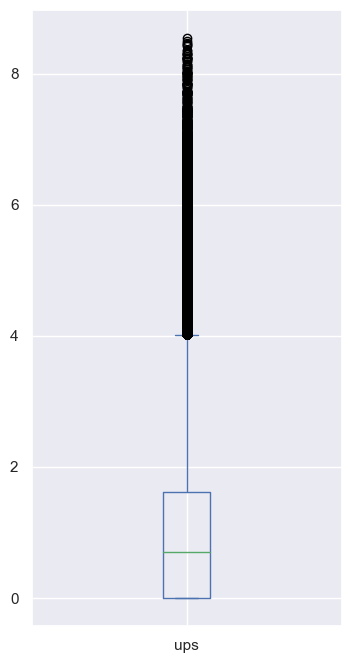

In [100]:
# limited visualization to get idea of distribution
plt.figure(figsize=(4,8))
np.log(reddit['ups']).plot(kind='box')


#### This is not an entirely accurate representation of the data as it excludes the negative values as well as 0 itself. Plotting without the log function leads to an essentially uninterprettable boxplot as there are so many individual data points outside of the box and the scale of the plot is skewed by the outliers.

Text(0.5, 1.0, 'Upvote Distribution')

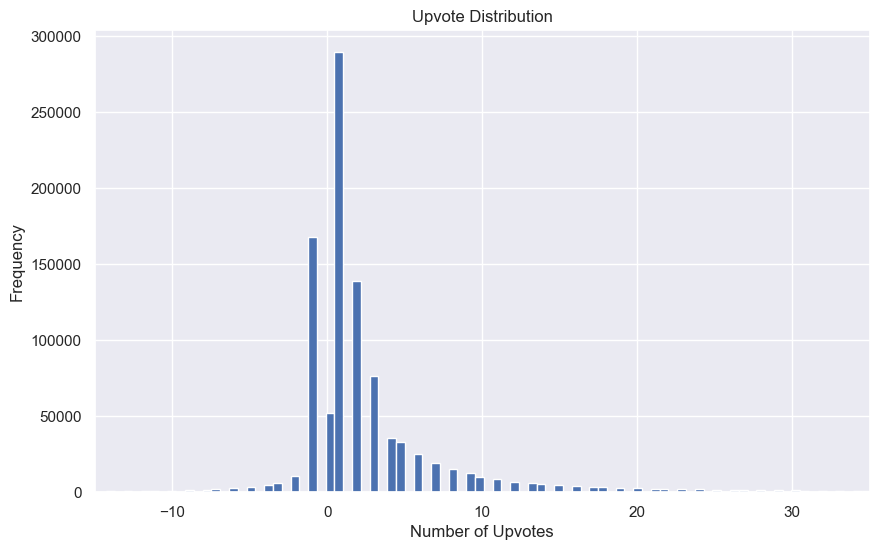

In [101]:
# plotting histogram to get a sense of the distribution
plt.figure(figsize=(10,6))
reddit['ups'].plot(kind='hist', bins=10000)
plt.xlim(-15,35)
plt.xlabel('Number of Upvotes')
plt.title('Upvote Distribution')

With this visual, we can see a particularily concerning frequency of `-1` values in our distribution. We will explore the reasoning behind this below.

In [102]:
# gathering list of percentages of 15 most frequent values 
reddit['ups'].value_counts().sort_values(ascending=False).head(15) / reddit.shape[0]*100

 1     28.648373
-1     16.625262
 2     13.750352
 3      7.577876
 0      5.129088
 4      3.532345
 5      3.252551
 6      2.485592
 7      1.900281
 8      1.506908
 9      1.217815
-2      1.064166
 10     0.979080
 11     0.830180
 12     0.694438
Name: ups, dtype: float64

Here we can see that the vast majority of the values lie within the range of `-2` and `9`. But again, the negative values are of concern to us, so we need to dig deeper to gather more information on what these values mean and how `ups`, `downs` and `score` relate to one another.

In [103]:
# `score` value distribution as % of frequency
reddit['score'].value_counts().sort_values(ascending=False).head(15) / reddit.shape[0]*100

 1     33.636476
 2     16.093673
 3      8.932718
 0      5.751698
 4      4.153174
 5      3.838753
 6      2.928434
-1      2.256652
 7      2.252299
 8      1.787197
 9      1.436564
-2      1.179724
 10     1.168940
 11     0.989171
 12     0.830773
Name: score, dtype: float64

Doing the same calculation for the `score`, we see that it has a very similar distribution, as well as negative values, which in this case do not concern us (for now), as they are entirely within the realm of possibility.

Text(0.5, 1.0, 'Score Distribution')

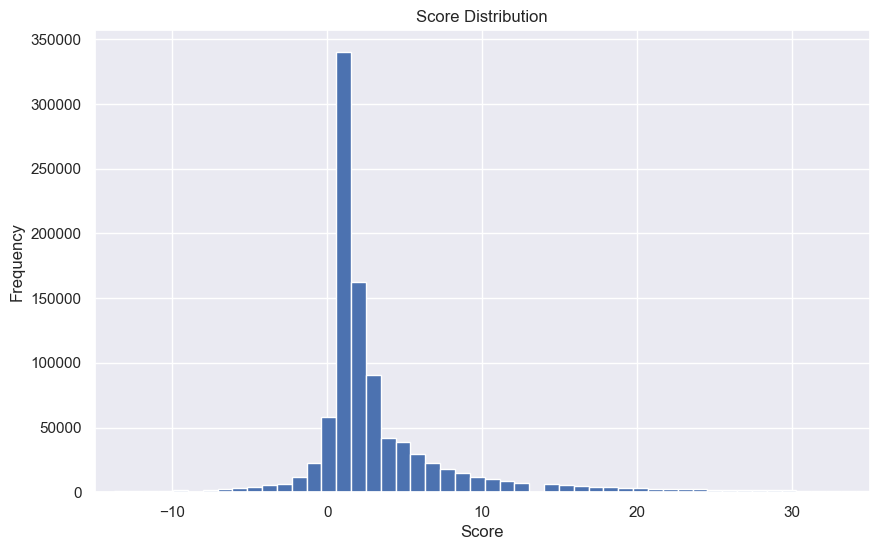

In [104]:
# plotting `score` values to get a sense of distribution
plt.figure(figsize=(10,6))
reddit['score'].plot(kind='hist', bins=10000)
plt.xlim(-15,35)
plt.xlabel('Score')
plt.title('Score Distribution')

With this visual we can see that by far the most frequent `score` value is `1`, and as discussed previously, the majority of the values lie between `-2` and `9`.

In [105]:
# confirmation of most frequent score
reddit['score'].mode()[0]

1

Now we can begin examining the negative values in the `ups` column to see if we can find a patter or explanation.
We begin by isolating the negative values and looking at a sample.

In [106]:
# random sample of `ups` values lower than 1
reddit.loc[reddit['ups'] < 0].sample(10, random_state=1)

,label,comment,author,subreddit,score,ups,downs,created_utc,parent_comment
2373,1,Or 4000!,7StarNat,sports,35,-1,-1,2016-11-06 05:53:51,Or alternatively the first time in 14 billion ...
74586,1,"Oh, well, good to see they unfucked the shit t...",irieCO,wow,10,-1,-1,2016-11-23 12:17:36,Updates: Class Changes
357187,1,"I care so deeply about this show,and i am asha...",Vitorfg,Showerthoughts,-15,-15,0,2016-01-10 19:12:47,Yeah not like she remains one of the 3 main ch...
111603,1,I disagree because last year the had one of ou...,thejewfro69,CFB,2,-1,-1,2016-12-15 18:27:00,ESPN is the laughing stock of the recruiting w...
7562,1,"She's, uhh, unique..?",unzip_da_baaaaag,trees,1,-1,-1,2016-12-17 17:03:30,This is my Christmas Tree!
150709,0,"That's why **you** cuddle up to her, then move...",theonewhogroks,AskReddit,1,-1,-1,2016-10-29 06:15:24,"If shes anything like my wife, she'd *still* c..."
87990,1,Have 5 years of experience in frameworks that ...,___Kosh,cscareerquestions,34,-1,-1,2016-12-11 07:09:43,What are the general requirements for an entry...
165720,0,These is the moderate opposition our governmen...,elolna,russia,3,-1,-1,2016-10-31 13:46:16,I am American and just moved back here after 3...
160857,1,"Yeah, thank god this sub is above cheap gags a...",FlashByNature,SquaredCircle,110,-1,-1,2016-10-01 14:01:12,"YouTube is the worst. Comments like ""CURRY BOY..."
106111,0,I get the same,RyKel46,TheWeeknd,1,-1,-1,2016-11-18 02:05:15,"Weird, know why I keep getting this error? ""Th..."


In examining the particular sample, there are a few things to note:
- most values = -1
- if `downs` = 0, `score` = `ups`
- in row 1, `ups` is -1 and `downs` is -1. The score is +2, which is strange
- in row 4, ""           ""               and The score is +3, which is even more strange


It is difficult to find a relationship between `ups`, `downs`, and `score` given this sample. Let us investigate further.

In [107]:
# seeing how many `ups` values there are below 0
reddit.loc[reddit['ups'] < 0].shape[0]

209158

There are a total of 200k `ups` values below 0

Perhaps the `downs` column can give us some insight about how the `score` is calculated.

In [108]:
# checking value counts of `downs`
reddit['downs'].value_counts()

 0    863308
-1    147437
Name: downs, dtype: int64

Checking the `value_counts` accomplishes two things: it gives us an idea of the distribution of values, as well as indicates how many unique values there are. Curiously, there seem to be only 2 unique values in the `downs` column.

In [109]:
# sanity check to confirm
reddit['downs'].nunique()

2

Having confirmed there are only 2 unique values, we can try to come up with an explanation:
- given there are > 1 million entries, it is very unlikely to not have a single post with more than one `downvote`
- it may be binary indicating whether `downvote` present or not
- the `downvote`s themselves are calculated within the `ups` column, explaining the negative values
- have little, if any, relationship with the `score` column

--------------------------------------------------------------------------------------------------------------------------------

Let us move on to the relationship between `ups` and `score`. In our sample, we noticed that when `downs` = 0, `ups` = `score`. Let us see how many cases of `ups` = `score` we have.

In [110]:
reddit.loc[reddit['ups'] == reddit['score']]

,label,comment,author,subreddit,score,ups,downs,created_utc,parent_comment
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09-22 21:45:37,They're favored to win.
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09-02 10:35:08,do you find ariana grande sexy ?
10,0,I think a significant amount would be against ...,ThisIsNotKimJongUn,politics,92,92,0,2016-09-20 17:53:52,I bet if that money was poured into college de...
14,0,"Ayy bb wassup, it makes a bit more sense in co...",Jakethejoker,NYGiants,29,29,0,2016-09-19 18:46:58,Ill give you a hint. They commented in this th...
18,0,"why you fail me, my precious?",kozmo1313,HillaryForPrison,1,1,0,2016-09-18 13:02:45,"Clinton struggles to gain traction in Florida,..."
...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


In [111]:
# instances of `ups` = `score`
reddit.loc[reddit['ups'] == reddit['score']].shape[0]

865515

There are 865k instances of `ups` = `score`, which as a percentage of the total data is:

In [112]:
# calculated as a percentage of total
reddit.loc[reddit['ups'] == reddit['score']].shape[0] / reddit.shape[0]*100

85.63139070685484

In 85% of entries, `ups` = `score`

------------------------------------------------------------------------------------------------------------------------------

Let us now take a look at the cases in which `score` /=/ `ups`

In [113]:
reddit.loc[reddit['ups'] != reddit['score']].sample(15, random_state=1)

,label,comment,author,subreddit,score,ups,downs,created_utc,parent_comment
77461,1,Math,420N1CKN4M3,Cubers,1,-1,-1,2016-12-24 04:51:07,Where's this number from?
181731,0,I find your lack of faith disturbing.,SannoSythe,videos,2,-1,-1,2016-12-21 13:02:15,Ugh. That fucking line.
1931,0,Paris is in it?,warriorsif,AskReddit,7,-1,-1,2016-11-28 19:11:22,How to Get Away With Murder started out seemin...
42315,1,They might even win back to back championships...,767676769,denvernuggets,3,-1,-1,2016-12-20 02:36:59,"imagine if I stop being a fan, they might even..."
70173,0,"Usually in a chain in patcher, and then using ...",3agl,edmproduction,1,-1,-1,2016-11-11 22:42:11,Do you use trash2 or any of these distortion p...
121940,0,The distance past the first down marker we wer...,Gobuckeyes69,CFB,21,-1,-1,2016-12-05 01:40:01,"When you said short and sweet, I thought it wa..."
184845,1,thank you for the help I never thought of that!,pmarion427,Warhammer,6,-1,-1,2016-10-16 02:00:28,Charge him.
50770,1,Cyka blyat - Rush B!,thezadmin,motorcycles,1,-1,-1,2016-11-17 19:36:38,Plus everyone will think you're Russian and le...
101000,0,Ol' Abe was one wonky looking guy.,FatStacks6969,pics,6,-1,-1,2016-10-02 18:48:08,Abraham Lincoln in color
134131,1,"What, you mean you don't like buying into a pr...",SuperGeometric,VIDEOENGINEERING,2,-1,-1,2016-12-09 03:10:36,"I guess that technically I should have said ""E..."


Something curious to be observed in this sample is that each and every `ups` value = `-1` Let us take a peak at the distribution of `ups` values:

In [114]:
# setting unequal `scores` and `ups` to variable
inequality = reddit.loc[reddit['ups'] != reddit['score']]

In [115]:
# checking unique values as well as count
inequality['ups'].value_counts()

-1    145230
Name: ups, dtype: int64

It turns out that the sample wasn't a fluke! 100% of the `ups` values when `score` /=/ `ups` are `-1`. A very unexpected result..

-------------------------------------------------------------------------------------------------------------------------

This means, however, that either `ups` = `score`, or `ups` = `-1`, therefore the `ups` column is redundant.

This, in combination with the lack of value that a binary `downs` column provides, we may drop both `ups` and `downs` while keeping `score`.

In [116]:
# dropping `ups` and `downs`
reddit.drop(columns=['ups','downs'], inplace=True)

In [117]:
# confirmation
reddit.head()

,label,comment,author,subreddit,score,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


-------------------------------------------------------------------------------------------------------------------------

Now aside from `label`, which is both binary and our target variable, `score` remains as our only numeric column.

We can take advantage of this by exploring their relationship in various ways.

We will start by examining their correlation, which, at the given moment is the only correlation we can examine.

In [118]:
# instantiating variables
label = reddit['label']
score = reddit['score']

np.corrcoef(label,score)

array([[ 1.        , -0.01001984],
       [-0.01001984,  1.        ]])

At -0.01, their correlation is effectively zero. It is safe to say that there is no relationship between the 2 variables.

In [119]:
# instantiating sarcastic and non_sarcastic variable for further analysis
sarcastic = reddit.loc[reddit['label'] == 1]
non_sarcastic = reddit.loc[reddit['label'] == 0]

In [120]:
sarcastic['score'].describe()

count    505340.000000
mean          6.401737
std          39.226796
min        -507.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        9070.000000
Name: score, dtype: float64

In [121]:
sarcastic['score'].nunique()

861

In [122]:
sarcastic['score'].value_counts().sort_values(ascending=False).head(15)

 1     148397
 2      76752
 3      44440
 0      35620
 4      22171
 5      20399
 6      15772
-1      14984
 7      12143
 8       9563
-2       8060
 9       7835
 10      6390
 11      5377
 12      4564
Name: score, dtype: int64

In [123]:
non_sarcastic['score'].describe()

count    505405.000000
mean          7.370550
std          55.992185
min        -298.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        5818.000000
Name: score, dtype: float64

In [124]:
non_sarcastic['score'].nunique()

1070

In [125]:
non_sarcastic['score'].value_counts().sort_values(ascending=False).head(15)

 1     191582
 2      85914
 3      45847
 0      22515
 4      19807
 5      18401
 6      13827
 7      10622
 8       8501
-1       7825
 9       6685
 10      5425
 11      4621
-2       3864
 12      3833
Name: score, dtype: int64

<Figure size 640x480 with 0 Axes>

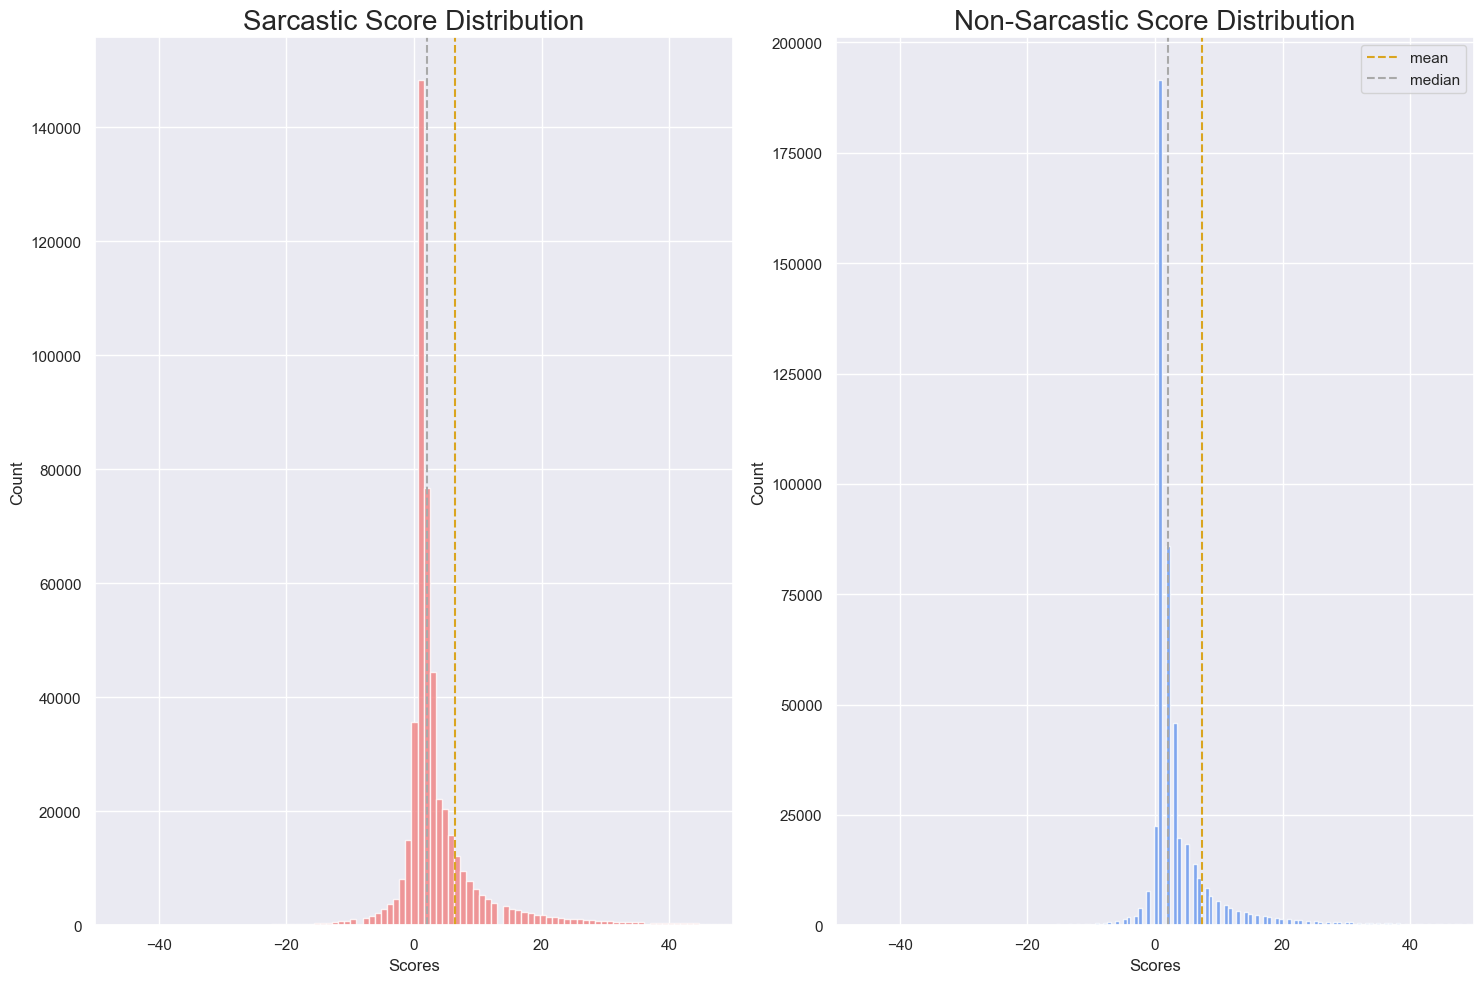

In [126]:
plt.figure()
plt.subplots(1,2, figsize=(15,10))

plt.subplot(1,2,1)
plt.hist(sarcastic['score'], bins=10000, color='lightcoral', alpha=0.8)
plt.xlabel('Scores')
plt.ylabel('Count')
plt.title('Sarcastic Score Distribution', fontsize=20)
plt.xlim(-50,50)
plt.axvline(np.mean(sarcastic['score']), linestyle='--', color='goldenrod', label='mean')
plt.axvline(np.median(sarcastic['score']), linestyle='--', color='darkgrey', label='median')


plt.subplot(1,2,2)
plt.hist(non_sarcastic['score'], bins=10000, color='cornflowerblue', alpha=0.8)
plt.xlabel('Scores')
plt.ylabel('Count')
plt.title('Non-Sarcastic Score Distribution', fontsize=20)
plt.xlim(-50,50)
plt.axvline(np.mean(non_sarcastic['score']), linestyle='--', color='goldenrod', label='mean')
plt.axvline(np.median(non_sarcastic['score']), linestyle='--', color='darkgrey', label='median')

plt.legend()
plt.tight_layout()
plt.show()

In [127]:
# dropping score
reddit.drop(columns='score', inplace=True)

------------------------------------------------------------------------------------------------------------------------------

Let us see if we can find the most saracastic `author`s.

In [128]:
# top (non)sarcastic authors
sarcastic_authors = sarcastic['author'].value_counts().sort_values(ascending=False).head(15)
non_sarcastic_authors = non_sarcastic['author'].value_counts().sort_values(ascending=False).head(15)

Text(0.5, 0.98, 'Top Posters')

<Figure size 1200x1200 with 0 Axes>

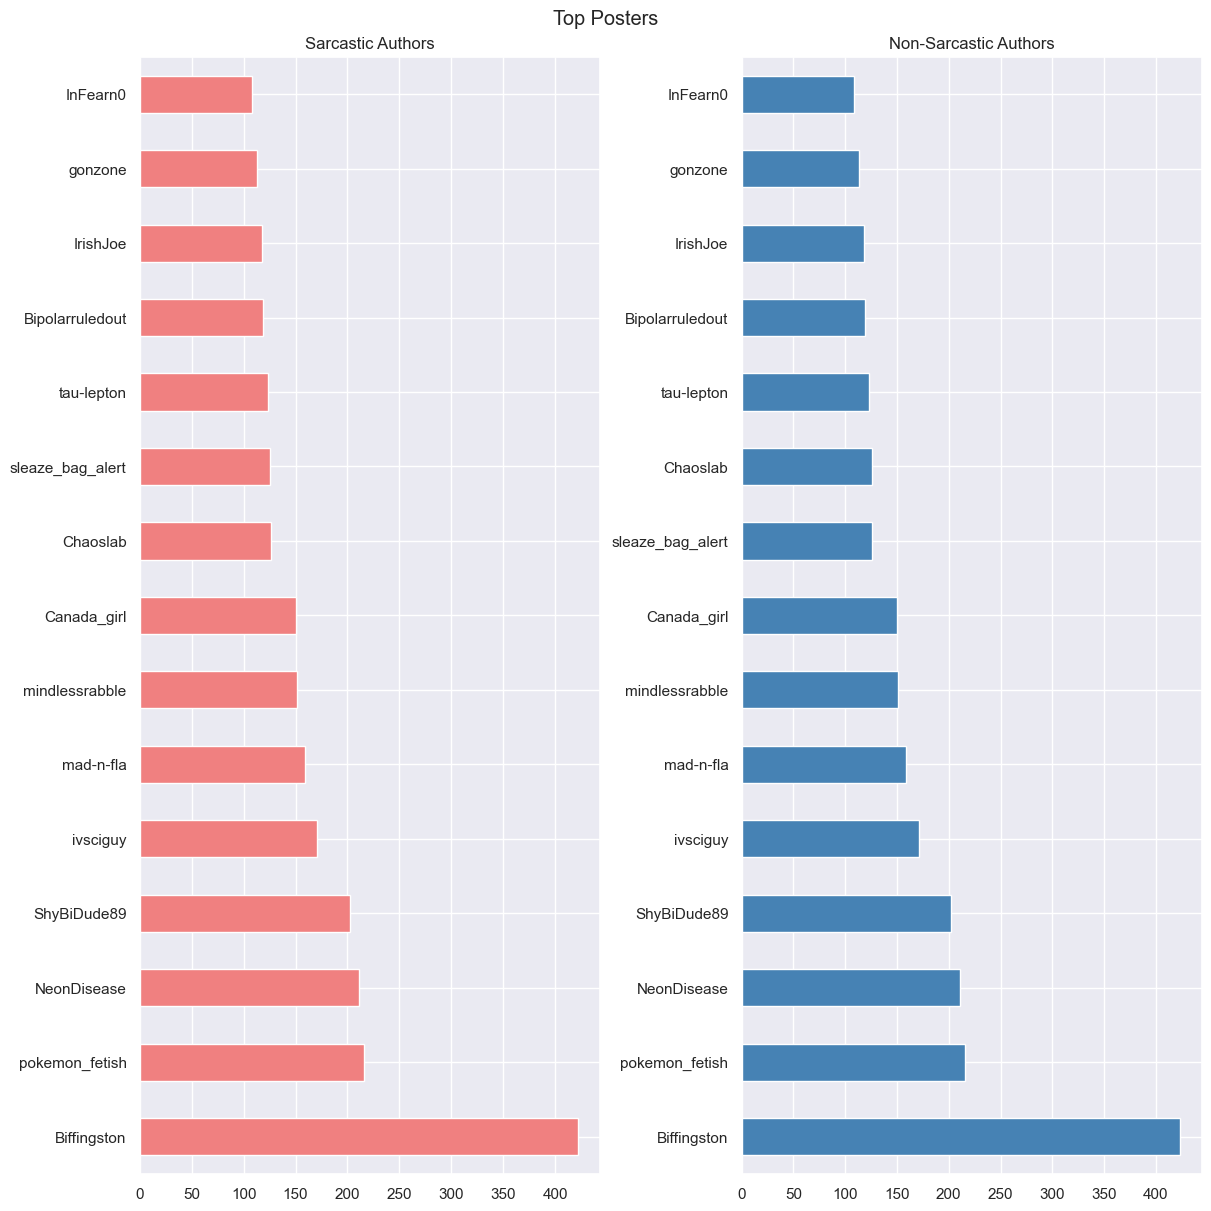

In [129]:
# plotting out findings

plt.figure(figsize=(12,12))
plt.subplots(1,2, constrained_layout=True, figsize=(12,12))


plt.subplot(1,2,1)
sarcastic_authors.plot(kind='barh', color='lightcoral', label='Sarcastic')
plt.title('Sarcastic Authors')




plt.subplot(1,2,2)
non_sarcastic_authors.plot(kind='barh', color='steelblue', label='Non-Sarcastic')
plt.title('Non-Sarcastic Authors')

plt.suptitle('Top Posters')


#### These tables look identical. It is not necessarily unexpected, because the most frequent posters may be both sarcastic and non-sarcastic and appear in both tables through sheer amount of contributions. What is unexpected however, is that the rankings are in the same order **and** appear to have the same numbers and proportions. We should double check the results of this plot. 

In [130]:
# checking number of unique sarcasic authors
sarcastic['author'].nunique()

256401

In [131]:
# and non-sarcastic
non_sarcastic['author'].nunique()

254257

The total number of authors is nearly the same.

In [132]:
# checking raw figures
sarcastic_authors

Biffingston         422
pokemon_fetish      216
NeonDisease         211
ShyBiDude89         202
ivsciguy            171
mad-n-fla           159
mindlessrabble      151
Canada_girl         150
Chaoslab            126
sleaze_bag_alert    125
tau-lepton          123
Bipolarruledout     119
IrishJoe            118
gonzone             113
InFearn0            108
Name: author, dtype: int64

In [133]:
non_sarcastic_authors

Biffingston         423
pokemon_fetish      216
NeonDisease         211
ShyBiDude89         202
ivsciguy            171
mad-n-fla           159
mindlessrabble      151
Canada_girl         150
sleaze_bag_alert    126
Chaoslab            126
tau-lepton          123
Bipolarruledout     119
IrishJoe            118
gonzone             113
InFearn0            108
Name: author, dtype: int64

Looking at the raw figures, the exact figures are identical, with the exception of several authors having a difference of 1. To ensure we have not made a mistake in the slicing, let us go back to the original dataset and see the total author counts.

In [134]:
# sanity check?
reddit['author'].value_counts().sort_values(ascending=False).head(15)

Biffingston         845
pokemon_fetish      432
NeonDisease         422
ShyBiDude89         404
ivsciguy            342
mad-n-fla           318
mindlessrabble      302
Canada_girl         300
Chaoslab            252
sleaze_bag_alert    251
tau-lepton          246
Bipolarruledout     238
IrishJoe            236
gonzone             226
InFearn0            216
Name: author, dtype: int64

The authors have indeed been split down the middle into the `sarcastic` and `non-sarcastic` groups. It is unexpected to have this perfect equality both within the `label` columns and `author` columns.

Given that the authors are evenly distributed among `sarcastic` and `non-sarcastic` groups, they hold very little predictive value. We can go ahead and drop the `author` column.

In [135]:
reddit.drop(columns='author', inplace=True)

In [136]:
# confirmation
reddit.head()

,label,comment,subreddit,created_utc,parent_comment
0,0,NC and NH.,politics,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,nba,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",nfl,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,MaddenUltimateTeam,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


Let us see if the same holds true for the `subreddit` column, or if it has a more varied distribution.

In [137]:
sarcastic_subreddits = sarcastic['subreddit'].value_counts().sort_values(ascending=False).head(15)
non_sarcastic_subreddits = non_sarcastic['subreddit'].value_counts().sort_values(ascending=False).head(15)

Text(0.5, 0.98, 'Top Subreddits')

<Figure size 1200x1200 with 0 Axes>

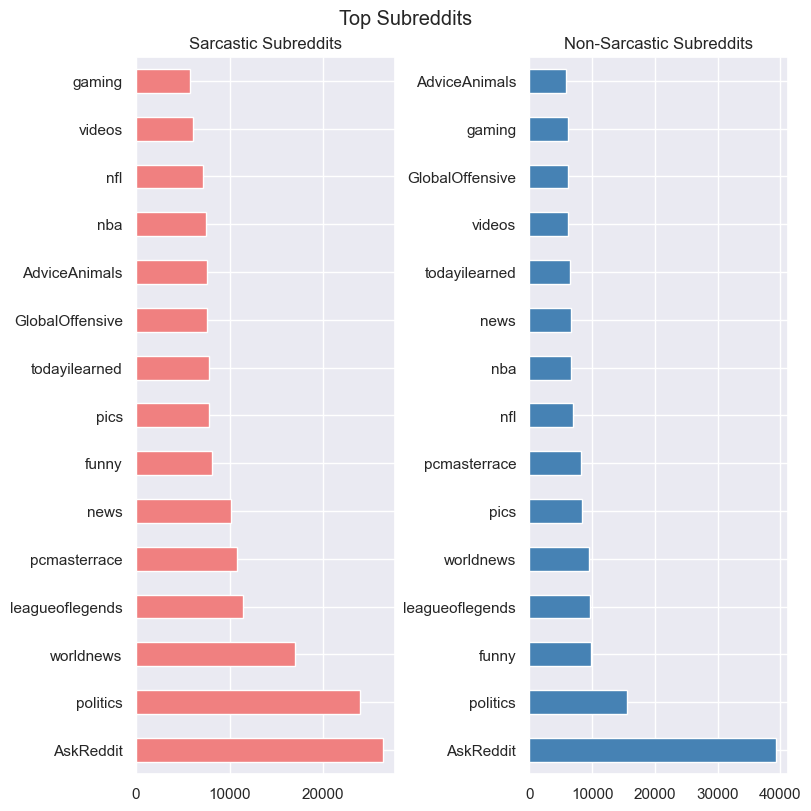

In [138]:
# plotting out findings

plt.figure(figsize=(12,12))
plt.subplots(1,2, constrained_layout=True, figsize=(8,8))


plt.subplot(1,2,1)
sarcastic_subreddits.plot(kind='barh', color='lightcoral')
plt.title('Sarcastic Subreddits')



plt.subplot(1,2,2)
non_sarcastic_subreddits.plot(kind='barh', color='steelblue')
plt.title('Non-Sarcastic Subreddits')

plt.suptitle('Top Subreddits')


There is some overlap between top `subreddits` which again, is to be expected, as the overall level of engagement is higher. There are however some differences and observations of note:
- `politics` is one of the subreddits with the highest overall engagement and is more sarcastic than not
- `funny` is less sarcastic than `news`
- `todayilearned`, which is an educational subreddit is in the top 10 most sarcastic

In [139]:
# total amount of sarcastic subreddits
sarcastic['subreddit'].nunique()

8993

In [140]:
non_sarcastic['subreddit'].nunique()

12836

Understandably, the amount of `subreddits` that include `sarcastic` comments is lower than `non-sarcastic`. Judging by the scale of the bar graphs above, we may infer that the `sarcastic` subreddits are slightly more evenly distributed. 

In [141]:
non_sarcastic['score'].describe()

count    505405.000000
mean          7.370550
std          55.992185
min        -298.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        5818.000000
Name: score, dtype: float64

In [142]:
non_sarcastic['score'].nunique()

1070

In [143]:
non_sarcastic['score'].value_counts().sort_values(ascending=False).head(25)

 1     191582
 2      85914
 3      45847
 0      22515
 4      19807
 5      18401
 6      13827
 7      10622
 8       8501
-1       7825
 9       6685
 10      5425
 11      4621
-2       3864
 12      3833
 13      3297
 14      2995
 15      2523
 16      2291
-3       2182
 17      2000
-4       1775
 18      1771
 19      1633
 21      1393
Name: score, dtype: int64

------------------------------------------------------------------------------------------------------------------------------

Let us take another look at the data as is before we proceed any further.

In [144]:
#taking another look at data
reddit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010745 entries, 0 to 1010825
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   label           1010745 non-null  int64         
 1   comment         1010745 non-null  object        
 2   subreddit       1010745 non-null  object        
 3   created_utc     1010745 non-null  datetime64[ns]
 4   parent_comment  1010745 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.3+ MB


In [145]:
# continued
reddit.head()

,label,comment,subreddit,created_utc,parent_comment
0,0,NC and NH.,politics,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,nba,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",nfl,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,MaddenUltimateTeam,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


We have removed nulls, duplicates, and redundant columns. The data is now ostensibly clean. What we do next to transform the given data depends on the model we intend to use.

Transforming the `comment` column `documents` into `tokens` will be a great start to further our EDA in preparation for our model.

In [146]:
# instantiating comment variable in preparation for bag-of-words
comments = reddit.copy().pop('comment')
comments.head()

0                                           NC and NH.
1    You do know west teams play against west teams...
2    They were underdogs earlier today, but since G...
3    This meme isn't funny none of the "new york ni...
4                      I could use one of those tools.
Name: comment, dtype: object

Having isolated the `comments` column, we can begin by looking for any trend in the length of the comments.

In [147]:
length = comments.str.split().str.len()
length.describe()

count    1.010745e+06
mean     1.046137e+01
std      1.053500e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      2.222000e+03
Name: comment, dtype: float64

Info summary:
- mean is 10 and median is 9
- min is understandably 1, while max is > 2000 words (tokens) long!!




Let us first visualize the distribution, controlling for outliers. We will later focus on the outliers.

<AxesSubplot: ylabel='Frequency'>

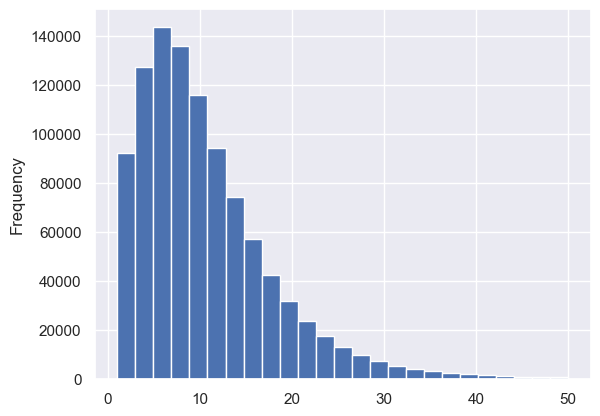

In [148]:
# visualizing string length
length[length <= 50].plot(kind="hist", bins=25)

We can take a snapshot of the biggest outliers (the longest comments) to see if we can gather any information on what they contain.

In [149]:
comments[length > 1000]

5556      DONALD TRUMP DONALD TRUMP DONALD TRUMP DONALD ...
75677     Fake news fake news Fake news fake news Fake n...
89444     fuck fuck fuck fuck fuck fuck fuck fuck fuck f...
104339    fuck fuck fuck fuck fuck fuck fuck fuck fuck f...
126164    LIAR Liar liar LIAR Liar liar LIAR Liar liar L...
146938    iPhone 7 iPhone 7 iPhone 7 iPhone 7 iPhone 7 i...
154696    PATCH NOTES General Gameplay Fixed technology ...
163043    fuck fuck fuck fuck fuck fuck fuck fuck fuck f...
186325    Nvidia GTX 1080 1070 1060 1050 Founders Editio...
217579    Comcast Comcast Comcast Comcast Comcast Comcas...
219087    Raving Raving Raving Raving Raving Raving Ravi...
283846    LOVE TRUMPS HATE LOVE TRUMPS HATE LOVE TRUMPS ...
382449    COMCAST COMCAST COMCAST COMCAST COMCAST COMCAS...
411840    #[MONEY MONEY MONEY MONEY MONEY MONEY MONEY MO...
757452    copy pasta copy pasta copy pasta copy pasta co...
939334    JERRY JERRY JERRY JERRY JERRY JERRY JERRY JERR...
975519    ***a mac is a PC*** ***a mac i

There seems to be a lot of repetition. The same word over and over again, 1000+ times. `copypasta` as one of the commenters blatantly denotes.

Let us also see if at a lower `length` cutoff the same pattern holds true, if all comments longer than 200 words are all copied and pasted.

In [150]:
comments[length > 300]

5556      DONALD TRUMP DONALD TRUMP DONALD TRUMP DONALD ...
75677     Fake news fake news Fake news fake news Fake n...
89444     fuck fuck fuck fuck fuck fuck fuck fuck fuck f...
104339    fuck fuck fuck fuck fuck fuck fuck fuck fuck f...
109391    First Lady of the United States First Lady of ...
110522    GENOCIDE GENOCIDE GENOCIDE GENOCIDE GENOCIDE G...
126164    LIAR Liar liar LIAR Liar liar LIAR Liar liar L...
146938    iPhone 7 iPhone 7 iPhone 7 iPhone 7 iPhone 7 i...
154696    PATCH NOTES General Gameplay Fixed technology ...
163043    fuck fuck fuck fuck fuck fuck fuck fuck fuck f...
164976    First Family TRUMP First Family TRUMP First Fa...
177068    You've got nothing, got nothing, got nothing, ...
186325    Nvidia GTX 1080 1070 1060 1050 Founders Editio...
217579    Comcast Comcast Comcast Comcast Comcast Comcas...
219087    Raving Raving Raving Raving Raving Raving Ravi...
283846    LOVE TRUMPS HATE LOVE TRUMPS HATE LOVE TRUMPS ...
285106    Islam Islam Islam Islam Islam 

The same seems to hold true of all comments longer than 300 words. We can safely drop these comments.

In [151]:
reddit.drop(reddit[reddit['comment'].str.split().str.len() > 300].index, inplace = True)

In [152]:
years_list = []
months_list = []
days_list = []

for i in reddit['created_utc']:
    years_list.append(i.year)
    months_list.append(i.month)
    days_list.append(i.day)
    
    

In [153]:
print(f' Lengths: \n Years List: {len(years_list)} \n Months List: {len(months_list)} \n Days List: {len(days_list)}')

 Lengths: 
 Years List: 1010716 
 Months List: 1010716 
 Days List: 1010716


In [154]:
reddit['year'] = years_list
reddit['month'] = months_list
reddit['day'] = days_list

In [155]:
reddit.head()

,label,comment,subreddit,created_utc,parent_comment,year,month,day
0,0,NC and NH.,politics,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",2016,10,16
1,0,You do know west teams play against west teams...,nba,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,2016,11,1
2,0,"They were underdogs earlier today, but since G...",nfl,2016-09-22 21:45:37,They're favored to win.,2016,9,22
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,2016-10-18 21:03:47,deadass don't kill my buzz,2016,10,18
4,0,I could use one of those tools.,MaddenUltimateTeam,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,2016,12,30


In [156]:
reddit.drop(columns='created_utc', inplace=True)

In [157]:
reddit.head()

,label,comment,subreddit,parent_comment,year,month,day
0,0,NC and NH.,politics,"Yeah, I get that argument. At this point, I'd ...",2016,10,16
1,0,You do know west teams play against west teams...,nba,The blazers and Mavericks (The wests 5 and 6 s...,2016,11,1
2,0,"They were underdogs earlier today, but since G...",nfl,They're favored to win.,2016,9,22
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,deadass don't kill my buzz,2016,10,18
4,0,I could use one of those tools.,MaddenUltimateTeam,Yep can confirm I saw the tool they use for th...,2016,12,30


In [158]:
sarcastic = reddit.loc[reddit['label'] == 1]
non_sarcastic = reddit.loc[reddit['label'] == 0]

In [159]:
sarcastic.head()

,label,comment,subreddit,parent_comment,year,month,day
33,1,But they'll have all those reviews!,ProductTesting,"The dumb thing is, they are risking their sell...",2016,11,1
44,1,wow it is totally unreasonable to assume that ...,politics,Clinton campaign accuses FBI of 'blatant doubl...,2016,11,1
45,1,Ho ho ho... But Melania said that there is no ...,politics,Anyone else think that it was interesting the ...,2016,10,18
66,1,I can't wait until @potus starts a twitter war...,politics,Here's what happens when Obama gives up his Tw...,2016,11,1
69,1,gotta love the teachers who give exams on the ...,CFBOffTopic,Monday night Drinking thread Brought to You by...,2016,11,1


In [160]:
non_sarcastic.head()

,label,comment,subreddit,parent_comment,year,month,day
0,0,NC and NH.,politics,"Yeah, I get that argument. At this point, I'd ...",2016,10,16
1,0,You do know west teams play against west teams...,nba,The blazers and Mavericks (The wests 5 and 6 s...,2016,11,1
2,0,"They were underdogs earlier today, but since G...",nfl,They're favored to win.,2016,9,22
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,deadass don't kill my buzz,2016,10,18
4,0,I could use one of those tools.,MaddenUltimateTeam,Yep can confirm I saw the tool they use for th...,2016,12,30


In [161]:
sarcastic.shape[0] / reddit.shape[0] * 100

49.998219084292714

<Figure size 640x480 with 0 Axes>

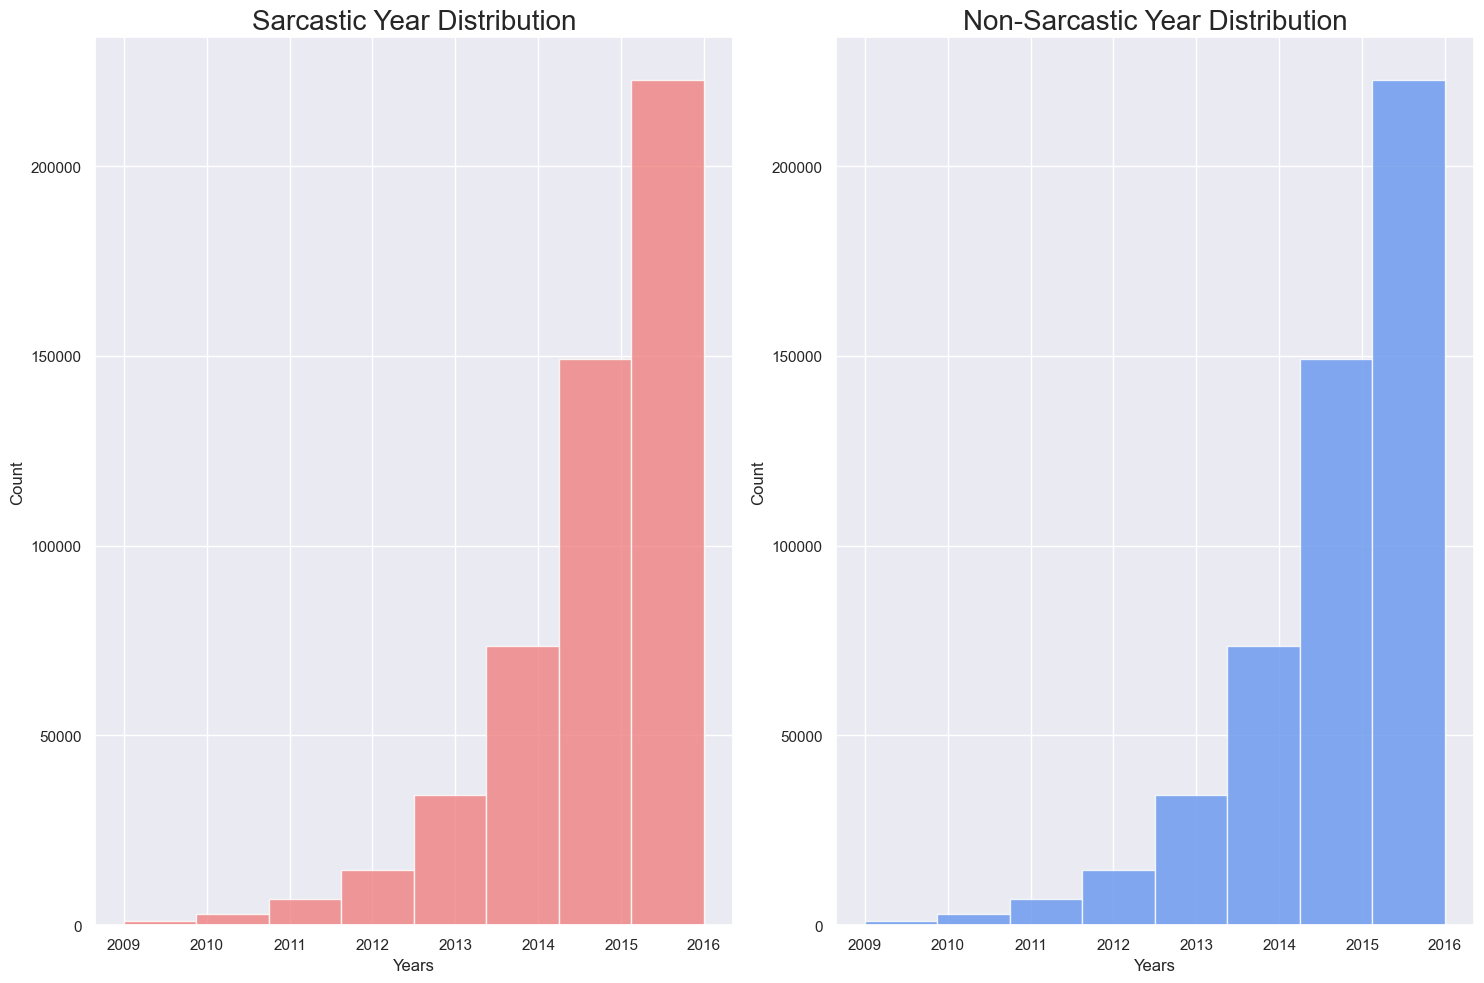

In [162]:
plt.figure()
plt.subplots(1,2, figsize=(15,10))

plt.subplot(1,2,1)
plt.hist(sarcastic['year'], bins=8, color='lightcoral', alpha=0.8)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Sarcastic Year Distribution', fontsize=20)

plt.subplot(1,2,2)
plt.hist(sarcastic['year'], bins=8, color='cornflowerblue', alpha=0.8)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Non-Sarcastic Year Distribution', fontsize=20)

plt.tight_layout()
plt.show()

In [163]:
sarcastic['year'].value_counts()

2016    222761
2015    149290
2014     73505
2013     34193
2012     14592
2011      6944
2010      2977
2009      1078
Name: year, dtype: int64

In [164]:
non_sarcastic['year'].value_counts()

2016    252885
2015    137554
2014     64006
2013     29364
2012     12714
2011      5779
2010      2302
2009       772
Name: year, dtype: int64

In [165]:
sarcastic.shape[0]

505340

In [166]:
non_sarcastic.shape[0]

505376

-------------------------------------------------------------------------------------------------------------------------------

In [167]:
reddit.head()

,label,comment,subreddit,parent_comment,year,month,day
0,0,NC and NH.,politics,"Yeah, I get that argument. At this point, I'd ...",2016,10,16
1,0,You do know west teams play against west teams...,nba,The blazers and Mavericks (The wests 5 and 6 s...,2016,11,1
2,0,"They were underdogs earlier today, but since G...",nfl,They're favored to win.,2016,9,22
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,deadass don't kill my buzz,2016,10,18
4,0,I could use one of those tools.,MaddenUltimateTeam,Yep can confirm I saw the tool they use for th...,2016,12,30


<Figure size 640x480 with 0 Axes>

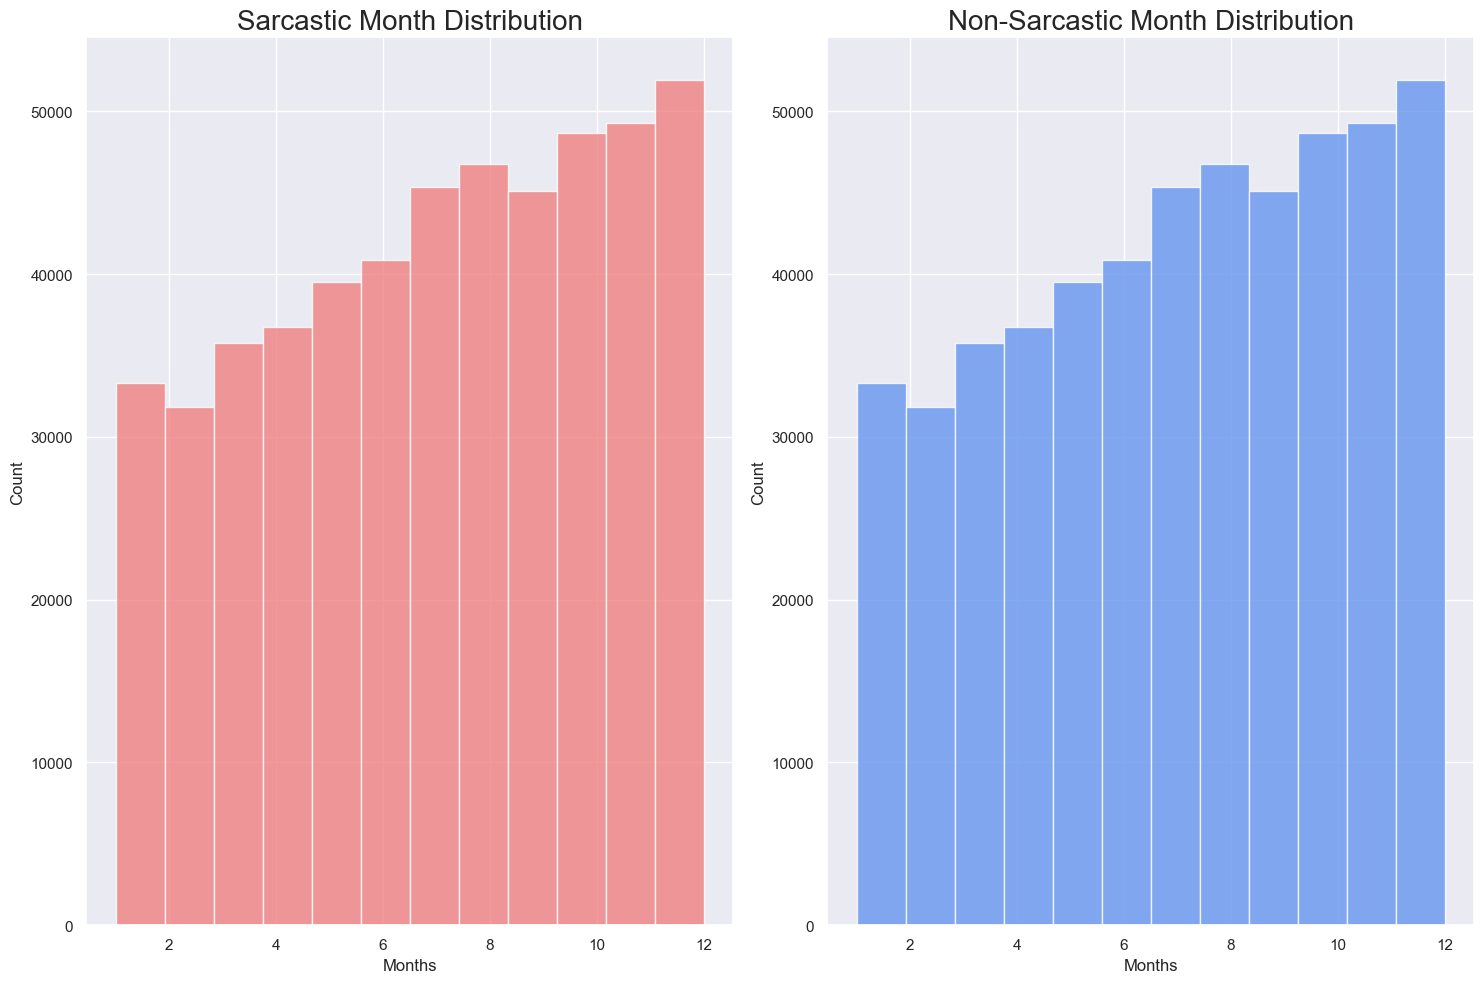

In [168]:
plt.figure()
plt.subplots(1,2, figsize=(15,10))

plt.subplot(1,2,1)
plt.hist(sarcastic['month'], bins=12, color='lightcoral', alpha=0.8)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Sarcastic Month Distribution', fontsize=20)

plt.subplot(1,2,2)
plt.hist(sarcastic['month'], bins=12, color='cornflowerblue', alpha=0.8)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Non-Sarcastic Month Distribution', fontsize=20)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

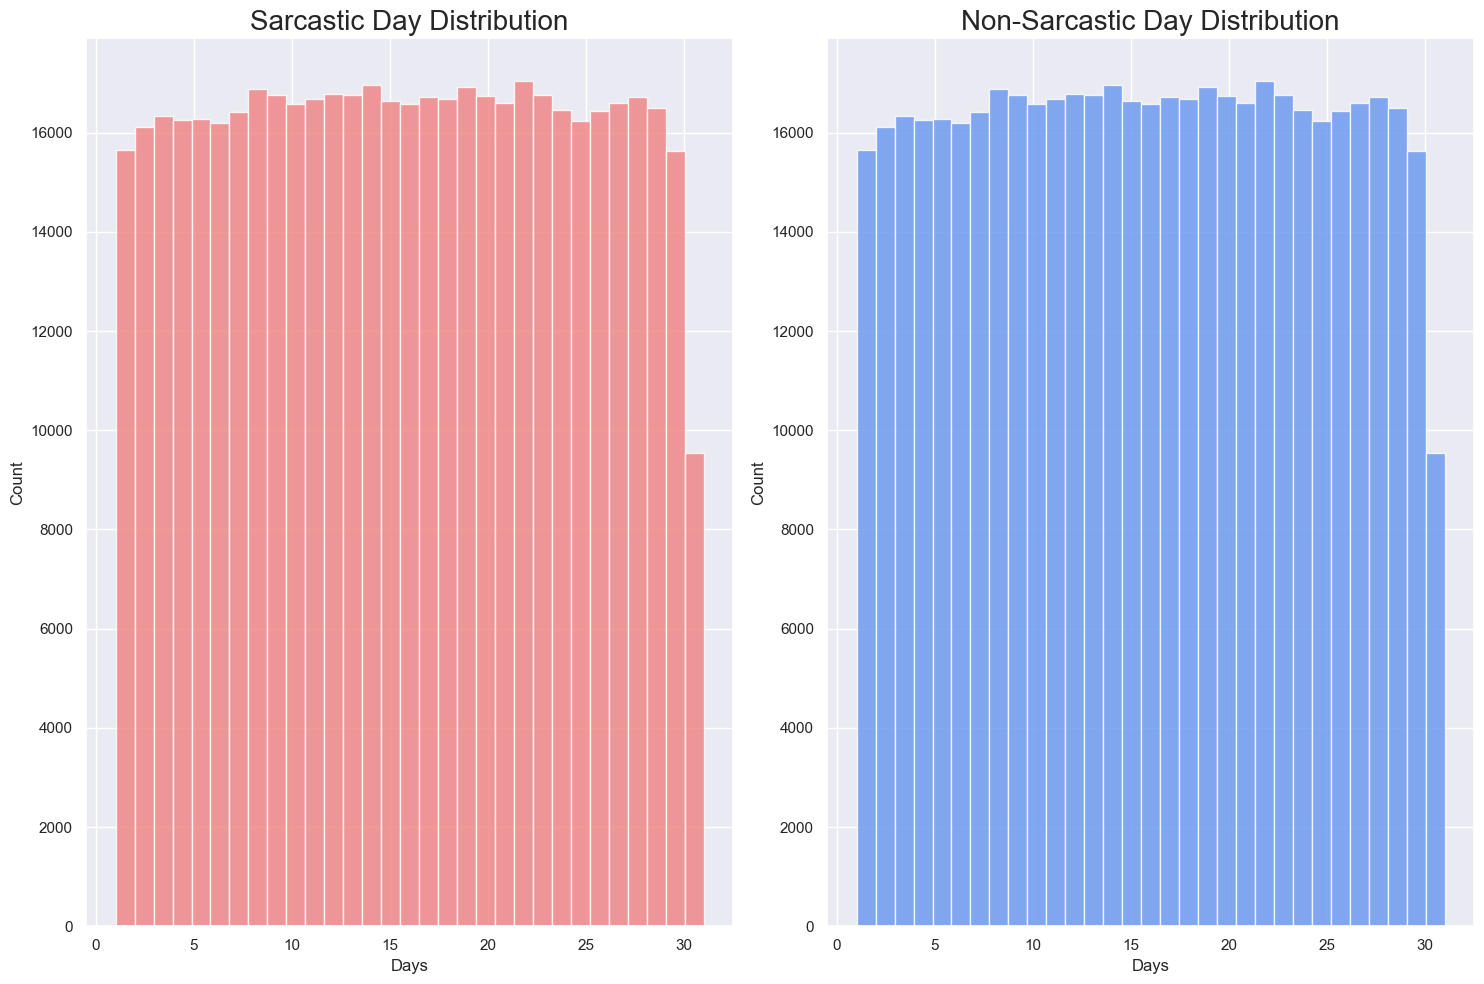

In [169]:
plt.figure()
plt.subplots(1,2, figsize=(15,10))

plt.subplot(1,2,1)
plt.hist(sarcastic['day'], bins=31, color='lightcoral', alpha=0.8)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Sarcastic Day Distribution', fontsize=20)

plt.subplot(1,2,2)
plt.hist(sarcastic['day'], bins=31, color='cornflowerblue', alpha=0.8)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Non-Sarcastic Day Distribution', fontsize=20)

plt.tight_layout()
plt.show()

In [170]:
reddit.drop(columns=['year','day'], inplace=True)

In [171]:
reddit.head()

,label,comment,subreddit,parent_comment,month
0,0,NC and NH.,politics,"Yeah, I get that argument. At this point, I'd ...",10
1,0,You do know west teams play against west teams...,nba,The blazers and Mavericks (The wests 5 and 6 s...,11
2,0,"They were underdogs earlier today, but since G...",nfl,They're favored to win.,9
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,deadass don't kill my buzz,10
4,0,I could use one of those tools.,MaddenUltimateTeam,Yep can confirm I saw the tool they use for th...,12


In [172]:
np.corrcoef(reddit['label'], reddit['month'])

array([[ 1.        , -0.02843567],
       [-0.02843567,  1.        ]])

In [173]:
reddit.drop(columns='month', inplace=True)

In [174]:
reddit['subreddit'].value_counts()

AskReddit                65671
politics                 39492
worldnews                26376
leagueoflegends          21034
pcmasterrace             18986
                         ...  
LabiaGW                      1
Expected                     1
AnimalsStoppingFights        1
panderingfromtheright        1
Pandemic                     1
Name: subreddit, Length: 14876, dtype: int64

In [175]:
(reddit['subreddit'].value_counts() < 2).sum()

6060

In [176]:
(reddit['subreddit'].value_counts() < 2).sum() / reddit['subreddit'].nunique()

0.4073675719279376

In [177]:
(reddit['subreddit'].value_counts() < 5).sum() / reddit['subreddit'].nunique()

0.6462086582414628

In [178]:
reddit.drop(columns='subreddit', inplace=True)

In [179]:
reddit.head()

,label,comment,parent_comment
0,0,NC and NH.,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",deadass don't kill my buzz
4,0,I could use one of those tools.,Yep can confirm I saw the tool they use for th...


In [180]:
#reddit.to_csv('comment_plus_parent.csv')

In [181]:
reddit.drop(columns='parent_comment', inplace=True)

In [182]:
reddit.head()

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.


In [183]:
reddit.shape[0]

1010716

In [184]:
reddit.shape[0] / 4

252679.0

In [185]:
reddit_sample = reddit.sample(252679, random_state=42)

In [186]:
percent_sarcastic = reddit_sample.loc[reddit_sample['label'] ==1 ].shape[0] / reddit_sample.shape[0] * 100

In [187]:
percent_sarcastic

50.001780915707286

In [188]:
reddit_sample.head()

,label,comment
139484,0,Nope.
638093,0,Donde esta la biblioteca?
662570,0,I feel bad for the mummy... not even the minio...
652534,1,"The Pirate Bay, of course!"
411846,1,That's exactly how multiple photographers ende...


In [189]:
reddit_sample.to_csv('sample_comments.csv')

In [113]:
reddit.to_csv('reddit_comments.csv')